In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

plt.rcParams['text.usetex'] = True

In [34]:
def draw_reg_map(data:np.ndarray):
    """
    
    Parameters
    ----------
    data : np.ndarray
        2D numpy array to visualize.
    """
    color_map = cm.magma

    # im_size = 100
    # im_size = 512
    im_size = data.shape[0]
    # n_bins = 50
    n_bins = im_size

    # data = np.random.normal(0, 0.2, size=(im_size,im_size))
        
    fig, ax = plt.subplots(figsize=(7,10))

    cax = ax.imshow(data, interpolation='nearest', cmap=color_map)

    divider = make_axes_locatable(plt.gca())
    
    # axBar = divider.append_axes("bottom", '5%', pad='7%')
    # axHist = divider.append_axes("bottom", '30%', pad='7%')

    # cbar = plt.colorbar(cax, cax=axBar, orientation='horizontal')
    
    axBar = divider.append_axes("right", '5%', pad='7%')
    # axHist = divider.append_axes("right", '30%', pad='7%')
    axHist = divider.append_axes("right", '30%', pad='20%')

    cbar = plt.colorbar(cax, cax=axBar, orientation='vertical')

    # get hist data
    N, bins, patches = axHist.hist(
        np.ndarray.flatten(data), 
        bins=n_bins,
        orientation='horizontal',  # Rotate the histogram
    )
    # plt.xlim(data.min(), data.max())
    plt.ylim(data.min(), data.max())
    # yticks color white
    plt.yticks(alpha=0)

    norm = Normalize(bins.min(), bins.max())
    # set a color for every bar (patch) according 
    # to bin value from normalized min-max interval
    for bin, patch in zip(bins, patches):
        color = color_map(norm(bin))
        patch.set_facecolor(color)

    plt.show()

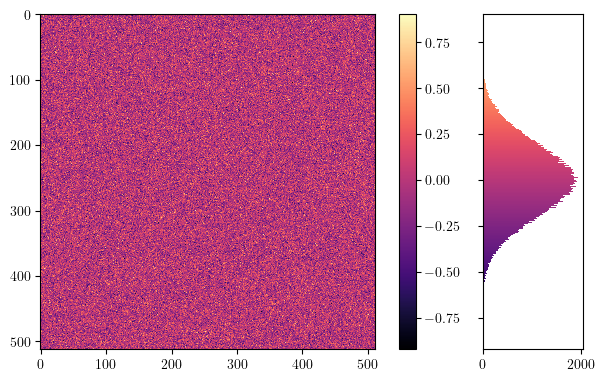

In [35]:
draw_reg_map(np.random.normal(0, 0.2, size=(512,512)))